<a href="https://colab.research.google.com/github/zideric/colab/blob/main/Udemi_reti_neurali_artificiali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esercizio del corso sul deeplearning di ProfessionAI, [qui](https://github.com/ProfAI/dl00/blob/master/4%20-%20Basi%20di%20reti%20neurali%20artificiali/Reti%20neurali%20artificiali.ipynb) il notebook originale

# Reti neurali artificiali

utilizziamo il dataset dei tumori al seno

importiamo i vari moduli

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

importiamo il dataset usando pandas

In [ ]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Creiamo gli array numpy da usare per il train e il test del modello

In [ ]:
X = breast_cancer.drop(['diagnosis','id'],axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

codifichiamo le label dell'array in numeri

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizziamo gli array che contengono le feature (li portiamo quindi tutti sulla stessa scala di valori)

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train.shape #serve per vedere come è formato il train set, in base a questo parametrizzeremo la rete neurale

(398, 30)

abbiamo un dataset di train composto da 398 esempi che hanno 30 feature

Possiamo creare la rete neurale artificiale, il primo modello sarà cosi composto:

* 30 nodi nello strato di input, corrispondono al numero delle feature del dataset
* 12 nodi nell'unico strato nascosto, dato scelto arbitriariamente da noi
* 1 nodo di output, perche in questo caso la classificazione è binaria, maligno o benigno

la funzione di attivazione per lo strato nascosto è la ReLU (per gli hydden layer si usa questa) mentre per lo strato di output si usa la Sigmoide

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1],activation="relu")) # add aggiunge un layer, Dense indica che ogni nodo prende in input tutte le feature input_dim è il numero di feature 
model.add(Dense(1, activation="sigmoid")) #aggiungiamo lo strato di output e usiamo sigmoide

Utilizziamo il metodo compile per configurare la fase di addestramento, specificando come funzione di ottimizzazione lo Stochastic Gradient Descent (parleremo nel dettaglio di questo algoritmo nella sezione apposita), come funzione da minimizzare la binary cross entropy e aggiungiamo come metrica aggiuntiva da visualizzare durante l'addestramento l'accuracy.

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

con il metodo summary del modello osserviamo il numero di parametri totali che la rete dovrà ottimizzare

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


Abbiamo 385 parametri in totale:

1.  Un peso per ogni connessione dai 30 nodi di input ai 12 nodi dello strato 
nascosto (30x12=260), più un bias per ogni nodo nello strato nascosto (12).
2.  Un peso per ogni connessione dello strato nascosto all'unico nodo dello strato di output (12), più un bias (1)

Facciamo partire l'addestramento.

In [ ]:
model.fit(X_train, y_train, epochs=100) #cento epoche, questo dato è da valutare

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.8186 - accuracy: 0.4829
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6069
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7511
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8071
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8752
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8916
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8854
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8781
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.9084
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.9155
Epoch 11/

all'epoca 99 il nostro modello ha un accuracy del 98% e un valore per la funzione di costo di 0,06, verifichiamo il risutlato anche sul set di test

In [ ]:
loss,acc = model.evaluate(X_test, y_test) #il metodo evaluate sul set di test ci ritorna accuracy e costo
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test sed: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9532
Loss sul test set: 0.1246
Accuracy sul test sed: 0.9532


# Reti neurali artificiali profonde

si dice profonda quando ha piu di un hidden layer

questa rete sarà cosi composta


*   **30 nodi** nello strato di input
*   **12 nodi** nel primo strato nascosto
*   **8 nodi** nel secondo strato nascosto
*   **4 nodi** nel terzo strato nascosto
*   **1 nodo** stato di output

come funzione di attivazione usiamo la ReLU per gli strati nascosti e sigmoide per l'output




In [ ]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
#model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________


Ora sono 517

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7517
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.8223
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8654
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.8761
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8940
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.9056
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8986
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.9085
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.9340
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9169
Epoch 11/

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9825
Loss sul test set: 0.0721
Accuracy sul test set: 0.9825


Aggiungendo 2 strati il modello è migliorato ancora


importo questa parte di codice che mi serve dopo per visualizzare i dati

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def showBounds(X,Y,model, labels=["classe negativa", "classe positiva"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Leaky Relu

reimplementiamo lo stesso modello ma usando la leaky Realu (a differenza delal Relu non considera come 0 i valori negativi, ma li considera come numeri piccoli ma cresenti applicando un valore "alpha" impostato da noi)

fa parte delle funzioni di attivazione avanzate di keras, [qui](https://keras.io/api/layers/activation_layers/) troviamo le altre

In [59]:
from keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01)) #la leaky non viene passata come parametro della Dense ma è uno step aggiuntivo
model.add(Dense(8)) #nel corso era impostato 4 ma a me dava risultati peggiori quindi ho messo 8
model.add(LeakyReLU(alpha=0.01))
#model.add(Dense(4))
#model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6496
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7350
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7628
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.8005
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.8377
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8547
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.8408
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.8698
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.8413
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.8503
Epoch 11/

In [60]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9708
Loss sul test set: 0.0802
Accuracy sul test set: 0.9708


con la leaky abbiamo ottenuto un risultato migliore

## Matrice di confusione

Nonostante le metriche della nostra rete neurale artificiale siano molto buone, dobbiamo tener conto du un ulteriore fattore. Quando si tratta di riconoscere un tumore, sbagliare nel diagnosticare un tumore maligno come benigno è molto più grave del classificare un tuomore benigno come maligno, infatti in quest'ultimo caso l'errore potrebbe venir fuori dopo ulteriori indagini mediche, mentre nel primo il paziente potrebbe non ricevere cure mediche necessarie per lui a causa dell'errore.

Questo problema è comune in molti problemi di classificazione, per affronterlo ci viene in contro una nuova metrica: la matrice di confusione.
La matrice di confusione ci permette di comprendere dove il nostro modello ha commesso degli errori.

Creiamo una matrice di confusione utilizzando la funzione plot_confusion_matrix disponibile all'interno del modulo viz.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


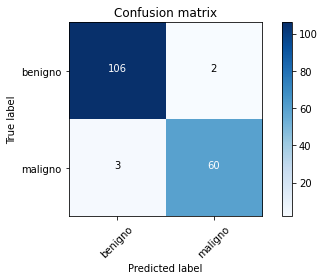

In [63]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_test) #effettuiamo la predizione con predic_classes visto che stiamo applicando una classificazione
#creiamo la matrice di confusione valutando la predizione con i dati del test set
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,["benigno","maligno"])
